In [82]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [60]:
data = pd.read_csv('chips.txt', delimiter=',', header=None, names=['a', 'b', 'y'])
data = data.sample(frac=1).reset_index(drop=True)
x = data[['a', 'b']]
y = data.y


h = 0.02
x_min, x_max = x.a.min(), x.a.max()
y_min, y_max = x.b.min(), x.b.max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
y_tmp = [1 - x for x in y]

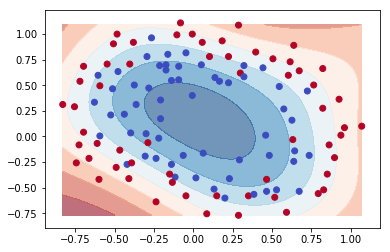

In [116]:
def best_params_svm(x, y, num_folds=10, score='roc_auc'):
    Cs = [0.001, 0.01, 0.1, 1, 10, 20, 30, 40, 50, 100]
    gammas = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=num_folds, scoring=score)
    grid_search.fit(x, y)
    
#     print("Grid scores on development set:")
#     print()
#     means = grid_search.cv_results_['mean_test_score']
#     stds = grid_search.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
#     print()
    
    return grid_search.best_params_


params_svm = best_params_svm(x, y)

model_svm = SVC(**params_svm)
model_svm.fit(x, y)

z_svm = model_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
z_svm = z_svm.reshape(xx.shape)

plt.contourf(xx, yy, z_svm, cmap=cm, alpha=0.6)

plt.scatter(x.a, x.b, c=y_tmp, cmap=plt.cm.coolwarm)
plt.savefig('svm.png', dpi=600)
plt.show()

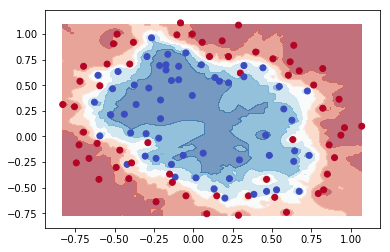

In [113]:
def best_params_knn(x, y, num_folds=10, score='roc_auc'):
    k_range = list(range(1, 31))
    weight_options = ["uniform", "distance"]
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    grid_search = GridSearchCV(knn(), param_grid, cv=num_folds, scoring=score)
    grid_search.fit(x, y)
    
    return grid_search.best_params_
    
params_knn = best_params_knn(x, y)


model_knn = knn(**params_knn)
model_knn.fit(x, y)

z_knn = model_knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
z_knn = z_knn.reshape(xx.shape)

plt.contourf(xx, yy, z_knn, cmap=cm, alpha=0.6)

plt.scatter(x.a, x.b, c=y_tmp, cmap=plt.cm.coolwarm)
plt.savefig('knn.png', dpi=600)
plt.show()